# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Right Circular Cone Radar Cross Section
***

Referring to Section 7.4.1.6, the geometry of the right circular cone is given in Figure 7.11. For axial incidence, the radar cross section is independent of polarization, and is written as (Equation 7.48)

$$
    \sigma = \frac{\lambda^2}{\pi}\frac{\left(\dfrac{ka\sin(\pi/n)}{n}\right)^2}{\Big( \cos(\pi/n) - \cos(3\pi/n)\Big)^2} \hspace{0.5in} \text{(m}^2\text{)},
$$


Equation 7.48 is for first-order diffraction only, which is valid when $ka \gg 1$.  Taking double diffraction into account, a more accurate expression for the axial radar cross section is (Equation 7.49)

\begin{align}
    \sigma = \frac{\lambda^2}{\pi}\left(\dfrac{ka\sin(\pi/n)}{n}\right)^2\, \Bigg| &\dfrac{1}{\big( \cos(\pi/n) - \cos(3\pi/n)\big)^2}  \nonumber \\[7pt]
    &+ \frac{\sin(\pi/n)\, \exp\Big(j(2ka - \pi/4)\Big)}{n\sqrt{\pi k a}\, \big( \cos(\pi/n) - \cos(3\pi/2n)\big)^2} \Bigg|^2 \hspace{0.15in} \text{(m}^2\text{)}.\nonumber 
\end{align}

If the angle of the incident energy is normal to the generator of the cone, $\theta_i = 90^\text{o} - \alpha$, then the geometrical theory of diffraction equations are no longer valid.  Instead, an expression based on the asymptotic expansion of the physical optics equation is used.  This is written as

\begin{equation}\label{eq:rcs_cone_normal}
    \sigma = \frac{8\lambda^2 \pi}{9 \sin^2\alpha\cos\alpha} \left(\frac{a}{\lambda}\right)^3 \hspace{0.5in} \text{(m}^2\text{)}.
\end{equation}

The other special case is when the cone is viewed from the base, $\theta_i = 180^o$.  For this case, the physical optics expression for a circular disc is used; see Table 7.1, and repeated here as

\begin{equation}\label{eq:rcs_cone_base}
    \sigma = \frac{\lambda^2(ka)^4}{4\pi} \hspace{0.5in} \text{(m}^2\text{)}.
\end{equation}

For all other incident angles, the radar cross section depends on the polarization of the incident energy, and is given by the following equations

\begin{align}\label{eq:rcs_cone_arbitrary_1}
    \sigma = &\frac{\lambda^2ka}{4\pi^2\sin\theta_i}\left(\frac{\sin(\pi/n)}{n}\right)^2 \times  \Bigg| \exp\Big[-j(2ka\sin\theta_i - \frac{\pi}{4})\Big] \Big[\Big(\cos\frac{\pi}{n} - 1\Big)^{-1} \nonumber \\[7pt] &\pm \Big(\cos\frac{\pi}{n} - \cos\frac{3\pi - 2\theta_i}{n} \Big)^{-1} \Big]  + \exp\Big[j(2ka\sin\theta_i - \frac{\pi}{4})\Big] \Big[\Big(\cos\frac{\pi}{n} - 1\Big)^{-1} \nonumber \\[7pt] 
    & \pm \Big(\cos\frac{\pi}{n} - \cos\frac{3\pi + 2\theta_i}{n} \Big)^{-1} \Big] \Bigg|^2, \, \, 0 < \theta_i < \alpha;
\end{align}

\begin{align}\label{eq:rcs_cone_arbitrary_2}
    \sigma = \frac{\lambda^2ka}{4\pi^2\sin\theta_i}\left(\frac{\sin(\pi/n)}{n}\right)^2 &\Bigg[\Big(\cos\frac{\pi}{n} - 1\Big)^{-1} \pm \nonumber \\[7pt] 
    & \Big(\cos\frac{\pi}{n} - \cos\frac{3\pi - 2\theta_i}{n} \Big)^{-1} \Bigg]^2, \, \,   \alpha < \theta_i < \pi/2;
\end{align}

\begin{align}\label{eq:rcs_cone_arbitrary_3}
    \sigma = &\frac{\lambda^2ka}{4\pi^2\sin\theta_i}\left(\frac{\sin(\pi/n)}{n}\right)^2 \times \Bigg| \exp\Big[-j(2ka\sin\theta_i - \frac{\pi}{4})\Big] \Big[\Big(\cos\frac{\pi}{n} - 1\Big)^{-1} \nonumber \\[7pt] 
    &  \pm \Big(\cos\frac{\pi}{n} - \cos\frac{3\pi - 2\theta_i}{n} \Big)^{-1} \Big]  + \exp\Big[j(2ka\sin\theta_i - \frac{\pi}{4})\Big] \Big[\Big(\cos\frac{\pi}{n} - 1\Big)^{-1} \nonumber \\[7pt] 
    &  \pm \Big(\cos\frac{\pi}{n} - \cos\frac{2\theta_i-\pi}{n} \Big)^{-1} \Big] \Bigg|^2, \, \, \pi/2 < \theta_i < \pi.
\end{align}

The positive sign is used for horizontal polarization and the negative sign is used for vertical polarization.
***

Begin by getting the library path

In [1]:
import lib_path

Set the operating frequency (Hz), the cone half angle (radians), and the base radius (m)

In [2]:
from numpy import radians

frequency = 1e9

cone_half_angle = radians(15.0)

base_radius = 1.4

Set up the incident angles (radians) using the `linspace` routine from `scipy`

In [3]:
from numpy import linspace

from scipy.constants import pi

incident_angle = linspace(0, pi, 1801)

Calculate the radar cross section (m^2) for the right circular cone

In [4]:
from Libs.rcs.right_circular_cone import radar_cross_section

from numpy import array

rcs = array([radar_cross_section(frequency, cone_half_angle, base_radius, ia) for ia in incident_angle])

Display the radar cross section (dBsm) for the right circular cone

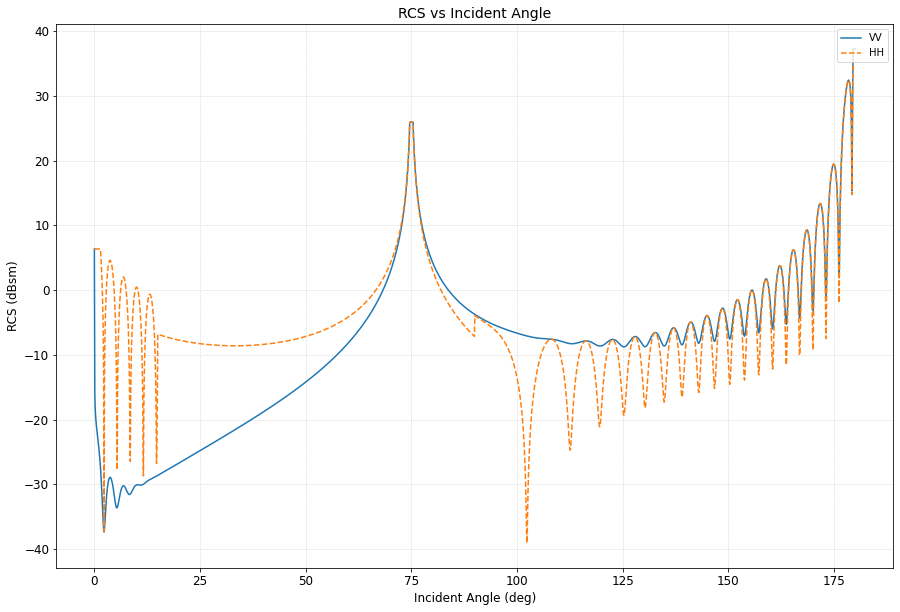

In [5]:
from matplotlib import pyplot as plt

from numpy import log10, degrees


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)




# Display the results

plt.plot(degrees(incident_angle), 10 * log10(rcs[:, 0]), '', label='VV')

plt.plot(degrees(incident_angle), 10 * log10(rcs[:, 1]), '--', label='HH')



# Set the plot title and labels

plt.title('RCS vs Incident Angle', size=14)

plt.ylabel('RCS (dBsm)', size=12)

plt.xlabel('Incident Angle (deg)', size=12)



# Set the tick label size

plt.tick_params(labelsize=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Set the legend

plt.legend(loc='upper right', prop={'size': 10})